# DSCI100 Final Project Report

# Introduction
In this project, we will analyze data collected by a research group in Computer Science at UBC about how people play video games. Players will contribute data by playing on PLAIcraft, which is a Minecraft server that the research group has set up to record players' actions and analyze how they navigate the world. Minecraft is one of the most popular creative sandbox games ever created, allowing users to adventure, build, craft, and much more. However, to ensure they have enough resources to handle the number of players on their server. Our goal is to help with their recruitment efforts, we will be trying to answer which "kinds" of players are most likely to contribute a large amount of data to target those players in our recruiting efforts. Specifically, the question that we will be focusing on is:

**Question: Can we use the number of played hours and age of players to predict their experience level?**

There are two different datasets, the players.csv dataset which consists of a total of 196 observations and 9 different variables: 

**players.csv**
1. **experience (chr):** Player's experience level 
2. **subscribe (lgl):** Indicates if a player is subscribed to PlaiCraft's email updates
3. **hashedEmail (chr):** Scrambled email of a player, which can be unscrambled with a key
4. **played_hours (dbl):** Total number of hours the player has played
5. **name (chr):** Player's name
6. **gender (chr):** Player's Gender
7. **age (dbl):** Player's Age
8. **individualID (lgl):** Individual ID of player
9. **organizationName (lgl):** Organization name of player

The second dataset is the sessions.csv dataset which consists of a total of 1536 observations and 5 different variables:

**sessions.csv**
1. **hashedEmail (chr):** Scrambled email of a player, which can be unscrambled with a key
2. **start_time (chr):** Start time of player's session
3. **end_time (chr):** End time of player's session 
4. **original_start_time (dbl):** scheduled start time in seconds since 01/01/1970
5. **original_end_time (dbl):** scheduled end time in seconds since 01/01/1970

Although there are two datasets, we will strictly look at the players.csv dataset to answer which "kinds" of players are most likely to contribute a large amount of data. Specifically, we will be using both age and played_hours to predict the experience level of a player. This will help with recruitment efforts, as we will be able to target those "kinds" of players to contribute the most amount of data.

# Methods and Results

The method that we will be using to address our question using the players.csv dataset is KNN classification. This is appropriate because we are predicting a categorical variable (experience) using two numerical variables (age, played_hours). Additionally, KNN classification is appropriate for the question we are trying to answer because we can use played_hours and age as our predictor variables. After all, those who play a lot of hours would be contributing the most data and likely have the most sessions as well. Thus, if we can predict which "kinds" (experience level) of players based on their number of played hours which correlates to the amount of data contributed, we could need to target them in our recruiting efforts. We will first plot the raw data to determine what wrangling is necessary.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


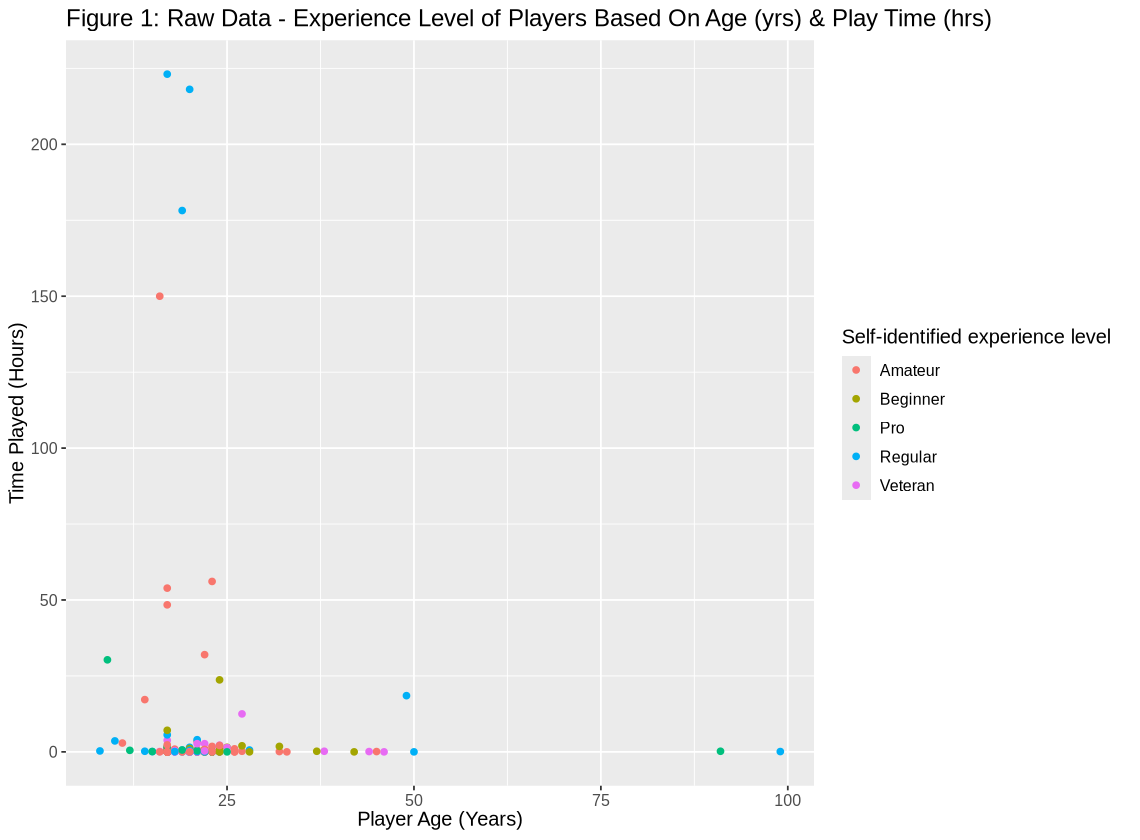

In [1]:
#initialising libraries
library(tidyverse)
library(RColorBrewer)
library(tidymodels)
library(tidyclust)
library(ggplot2)
library(gridExtra)

#reading in the data
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players <- read_csv(players_url)
head(players)

#initial plot of the three variables of interest: play time, age, & experience level
options(repr.plot.width = 9.5, repr.plot.height = 7) #initialising plot dimensions

raw_plot <- players |> ggplot(aes(x = age, y = played_hours)) + #plotting total hours played against player age
        geom_point(aes(color = experience)) + #labelling data points based on player experience
        labs(x = "Player Age (Years)",
                 y = "Time Played (Hours)", 
                 colour = "Self-identified experience level", 
                 title = "Figure 1: Raw Data - Experience Level of Players Based On Age (yrs) & Play Time (hrs)") +
        theme(text = element_text(size = 12))
raw_plot

When we plot the raw data, we notice that there are far more observations for players under age 50 and those with more than 0 hours of playtime. Namely, many players contributed zero hours to the server, cluttering that part of the graph. Furthermore, if we are trying to analyze which players are most likely to contribute to a large amount of data, those with 0 played hours would not be useful, as they are not contributing data at all. Assuming that the ideal demographic for the researchers would be those who are university to prime working age due to ease of sampling, we decided to filter the data to consider only those who are 50 years old or younger. Additionally, there are a lot of columns that are not relevant to our question and thus would not be used in our classification model. Now, we may wrangle and clean our data to prepare it for analysis:

### Cleaning and Wrangling The Data

To clean and wrangle our data to prepare it for KNN classification, we select only the relevant columns and filter based on the number of played hours greater than 0 and age under 50. We also convert the character experience variable to the factor datatype so it can be used for classification and drop any NA's from our cleaned dataset.

In [2]:
players_filtered <- players |>
    select(experience, played_hours, age) |> #select only relevant columns
    filter(played_hours > 0, age < 50) |> #filter the number of played hours and age
    mutate(experience = as_factor(experience)) |>
    drop_na(experience, age, played_hours)
head(players_filtered)

experience,played_hours,age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.1,17
Veteran,1.6,23


### Dataset Summary
The cleaned and wrangled dataset that we will be using for our analysis consists of total of 111 observations and 3 different variables:
1. **RESPONSE VARIABLE - experience (fct):** Player's experience level
4. **PREDICTOR VARIABLE - played_hours (dbl):** Total number of hours the player has played
7. **PREDICTOR VARIABLE - age (dbl):** Player's Age

Visualizing our cleaned data and labelling the datapoints based on player experience yields the following graph:

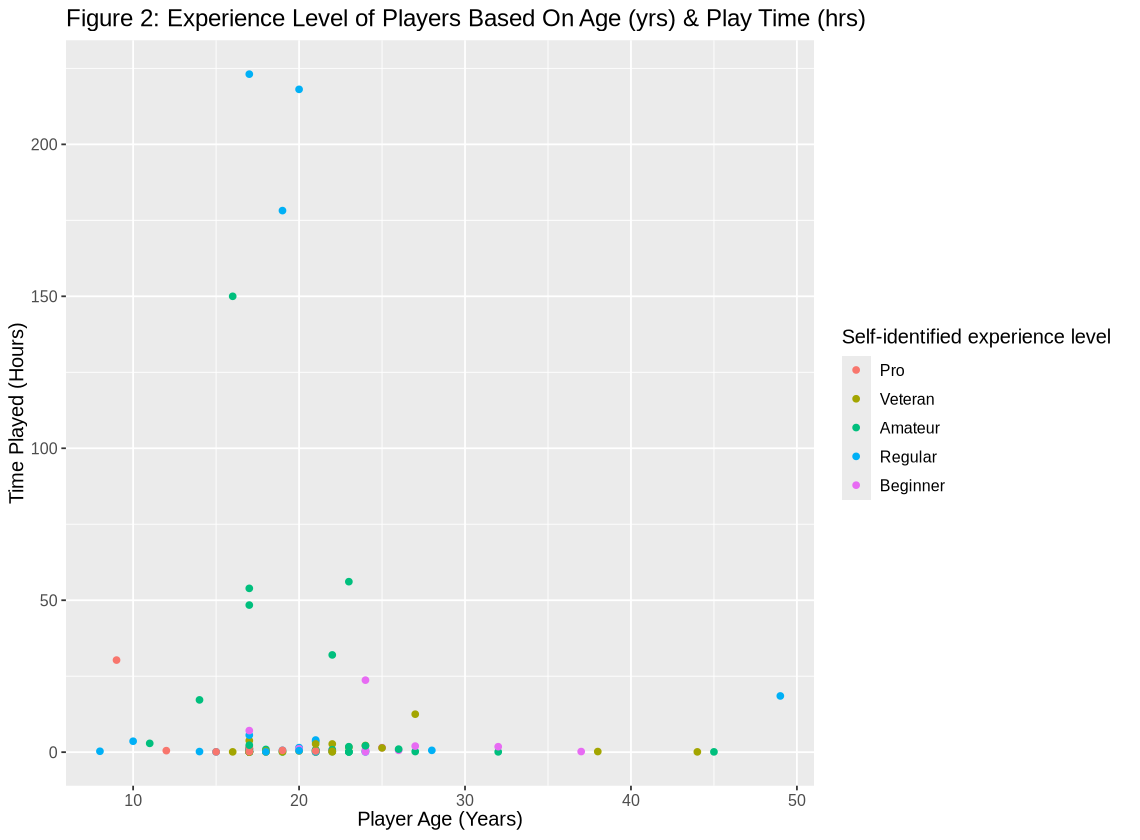

In [3]:
#plotting the cleaned data
players_plot <- players_filtered |>
            ggplot(aes(x = age, y = played_hours)) + #plotting total hours played against age of player
            geom_point(aes(color = experience)) + #labelling each point based on player experience
            labs(x = "Player Age (Years)",
                 y = "Time Played (Hours)", 
                 colour = "Self-identified experience level", 
                 title = "Figure 2: Experience Level of Players Based On Age (yrs) & Play Time (hrs)")+
            theme(text = element_text(size = 12))
players_plot

This visualization is useful for exploratory data analysis because it allows us to explore the relationship between age and played hours. We can see if there are any patterns, trends, or outliers as well as which experience levels have the most amount of played hours. This provides some very useful introductory insight to answering our question. Additionally, we create more visualizations to help with exploratory data analysis. This plot highlights the number of played hours for each experience level:

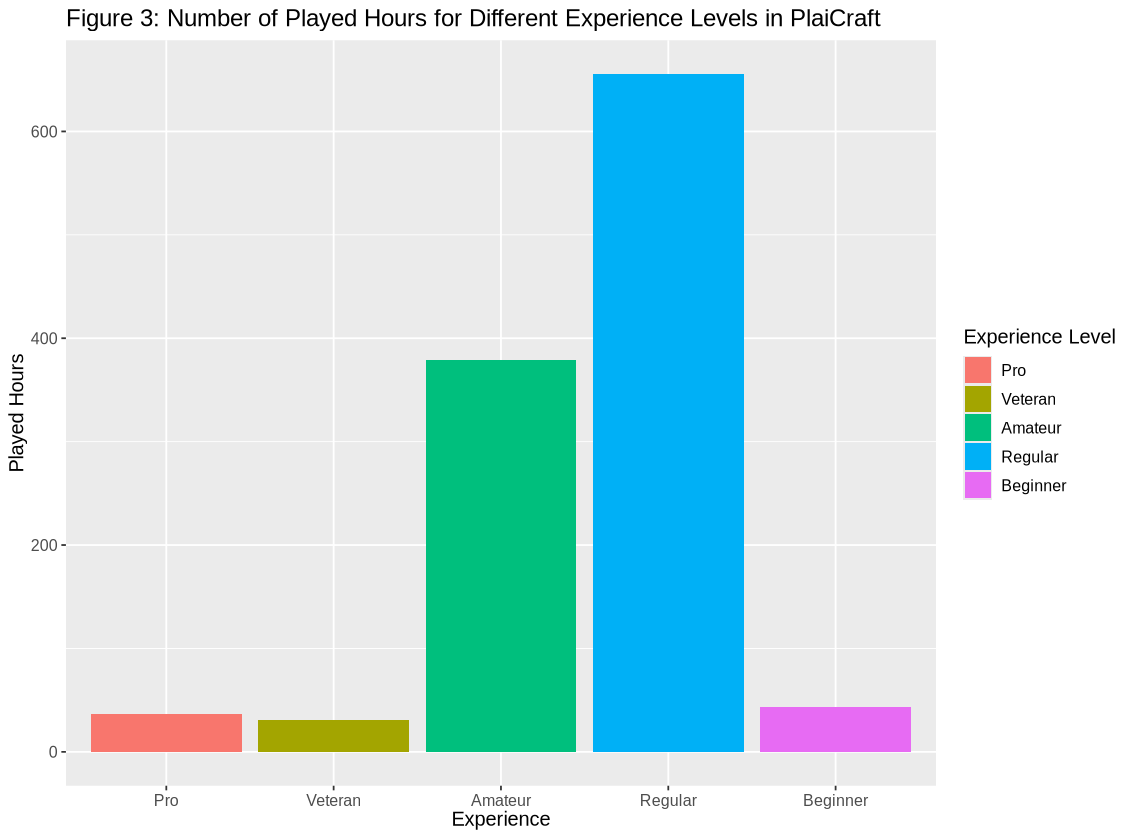

In [4]:
players_plot <- players_filtered |>
    ggplot(aes(x = experience, y = played_hours, fill = experience)) +
    geom_bar(stat = "identity") +
    labs(x = "Experience", y = "Played Hours", fill = "Experience Level") +
    ggtitle("Figure 3: Number of Played Hours for Different Experience Levels in PlaiCraft") +
        theme(text = element_text(size = 12))
players_plot

Notably, this is useful for analysis because we see that players who identify themselves as "regulars" contribute the significant most hours of any experienced group. Thus, it is very valuable if we are able to use KNN classification to successfully predict player experience levels based on the number of hours or amount of data they contribute.

### KNN Classification Analysis

We start by randomly splitting our data into a training set and a test set. This is because we will use the training set to build our classifier, while we use the test set to evaluate the performance of the classifier. Typically the training set varies from 50%-95% of the data, while the testing set varies from 5%-50% of the data. We will be using a 75% training data and 25% testing data split.

In [5]:
#splitting the data into training & testing data
set.seed(5555) #setting seed for reproducibility

split <- players_filtered |>
        initial_split(prop = 0.75, strata = experience) #randomly splitting the data into 75% training data & 25% testing data
training <- training(split) #training dataset, 80 observations
testing <- testing(split)  #testing dataset, 29 observations
head(training)
head(testing)

experience,played_hours,age
<fct>,<dbl>,<dbl>
Amateur,0.7,21
Amateur,0.1,17
Amateur,0.2,22
Amateur,0.5,17
Amateur,0.1,17
Amateur,0.7,21


experience,played_hours,age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Regular,0.1,21
Beginner,1.5,25
Amateur,48.4,17
Regular,0.6,28


#### Training and Testing Set Summary
The training dataset consists of 80 observations and 3 variables

1. **RESPONSE VARIABLE - experience (fct):** Player's experience level
4. **PREDICTOR VARIABLE - played_hours (dbl):** Total number of hours the player has played
7. **PREDICTOR VARIABLE - age (dbl):** Player's Age

The testing dataset consists of 29 observations and 3 variables

1. **RESPONSE VARIABLE - experience (fct):** Player's experience level
4. **PREDICTOR VARIABLE - played_hours (dbl):** Total number of hours the player has played
7. **PREDICTOR VARIABLE - age (dbl):** Player's Age

When tuning our K value based on the best accuracy, we will only look at up to 10 neighbors. This is because our dataset is quite small, and more neighbors may lead to overfitting or an overly generalized model, reducing the accuracy. Additionally, we will perform a 3-fold cross-validation. Typically 5-fold or 10-fold cross-validation is preferred, but due to the nature of the size our data, 3-fold cross-validation is a reasonable choice

In [6]:
experience_recipe <- recipe(experience ~ age + played_hours, data = players_filtered) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

experience_vfold <- vfold_cv(training, v = 3, strata = experience)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_results <- workflow() |>
    add_recipe(experience_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = experience_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy")

We can now create a plot to visualize the best choice of K that provides the best accuracy estimate.

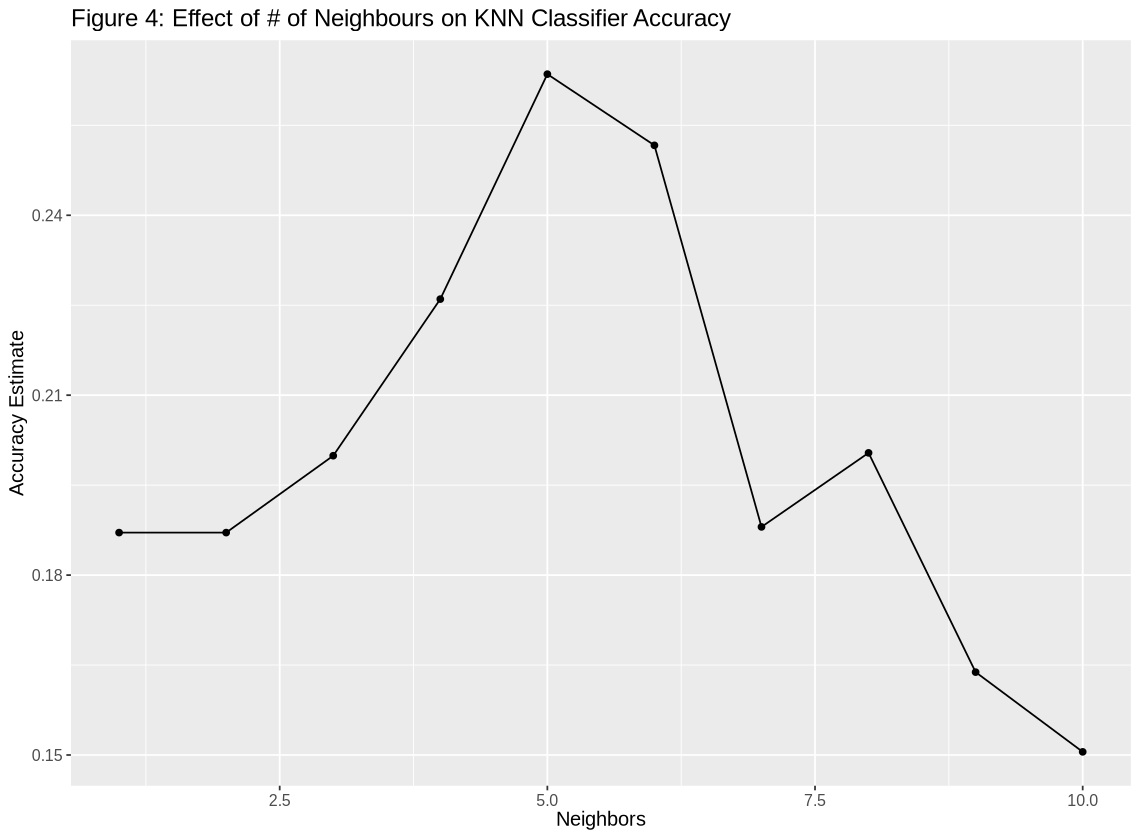

In [7]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 4: Effect of # of Neighbours on KNN Classifier Accuracy") +
  theme(text = element_text(size = 12))
accuracy_vs_k

best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)

After tuning the K-NN classifer and choosing K = 5, which is the neighbor with the highest accuracy score, we can now retrain our K-NN classifier on all of the training data, but this time using K = 5.

In [8]:
knn_spec_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit_best_k <- workflow() |>
    add_recipe(experience_recipe) |>
    add_model(knn_spec_best_k) |>
    fit(data = training)

experience_test_predictions <- predict(knn_fit_best_k, testing) |>
    bind_cols(testing)

experience_test_predictions |>
    metrics(truth = experience, estimate = .pred_class) |>
    filter(.metric == "accuracy")

experience_test_predictions |>
    precision(truth = experience, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.2068966


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.1366667


We can analyze the results of our model using a confusion matrix as well:

In [9]:
matrix <- experience_test_predictions |>
             conf_mat(truth = experience, estimate = .pred_class)
matrix

          Truth
Prediction Pro Veteran Amateur Regular Beginner
  Pro        0       1       1       1        0
  Veteran    0       0       0       1        0
  Amateur    0       5       4       3        3
  Regular    2       0       1       1        0
  Beginner   1       1       3       0        1

Thus, through KNN classification we were able to predict the experience levels of players based on played_hours and age.

### Clustering Analysis

It is also of interest to us to see if we can use KNN clustering to visualize which players are high or just regular contributors to the server. Clustering may provide us with a different angle of seeing our question based on the same data, which may help explain our results from KNN classification. In addition, there may be patterns in the data that we were previously unable to see, which by using unsupervised learning as opposed to supervised learning may be able to detect interesting clusters. We begin by testing our model for clusters between 1 and 10, as well as standardizing the values for played hours and player age.

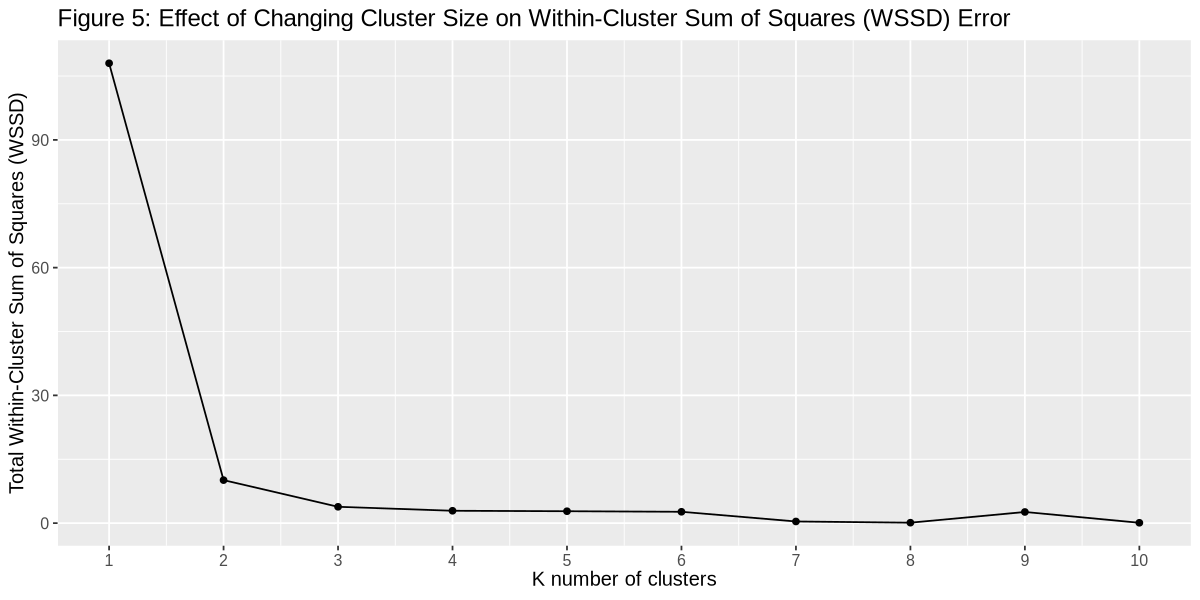

In [10]:
set.seed(5555) #setting seed for reproducibility

options(repr.plot.width = 10, repr.plot.height = 5)

players_kmeans <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 10)

players_recipe <- recipe(~ played_hours, age, data = players_filtered) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_ks <- tibble(num_clusters = 1 : 10)

players_elbow_stats <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_kmeans) |>
    tune_cluster(resamples = apparent(players_filtered), grid = players_ks) |>
    collect_metrics() |>
    mutate(total_WSSD = mean) |>
    filter(.metric == "sse_within_total") |>
    select(num_clusters, total_WSSD)

players_elbow_plot <- 
    ggplot(players_elbow_stats, 
               aes(x = num_clusters, y = total_WSSD)) +
        geom_point() +
        geom_line() +
        xlab("K number of clusters") +
        ylab("Total Within-Cluster Sum of Squares (WSSD)") +
        ggtitle("Figure 5: Effect of Changing Cluster Size on Within-Cluster Sum of Squares (WSSD) Error") +
        scale_x_continuous(breaks = 1:10) +
        theme(text = element_text(size = 12))
players_elbow_plot

We can identify from the plot above that that flat "elbow" occurs when K = 2, meaning that we can now retest the clusters for the correct K value.

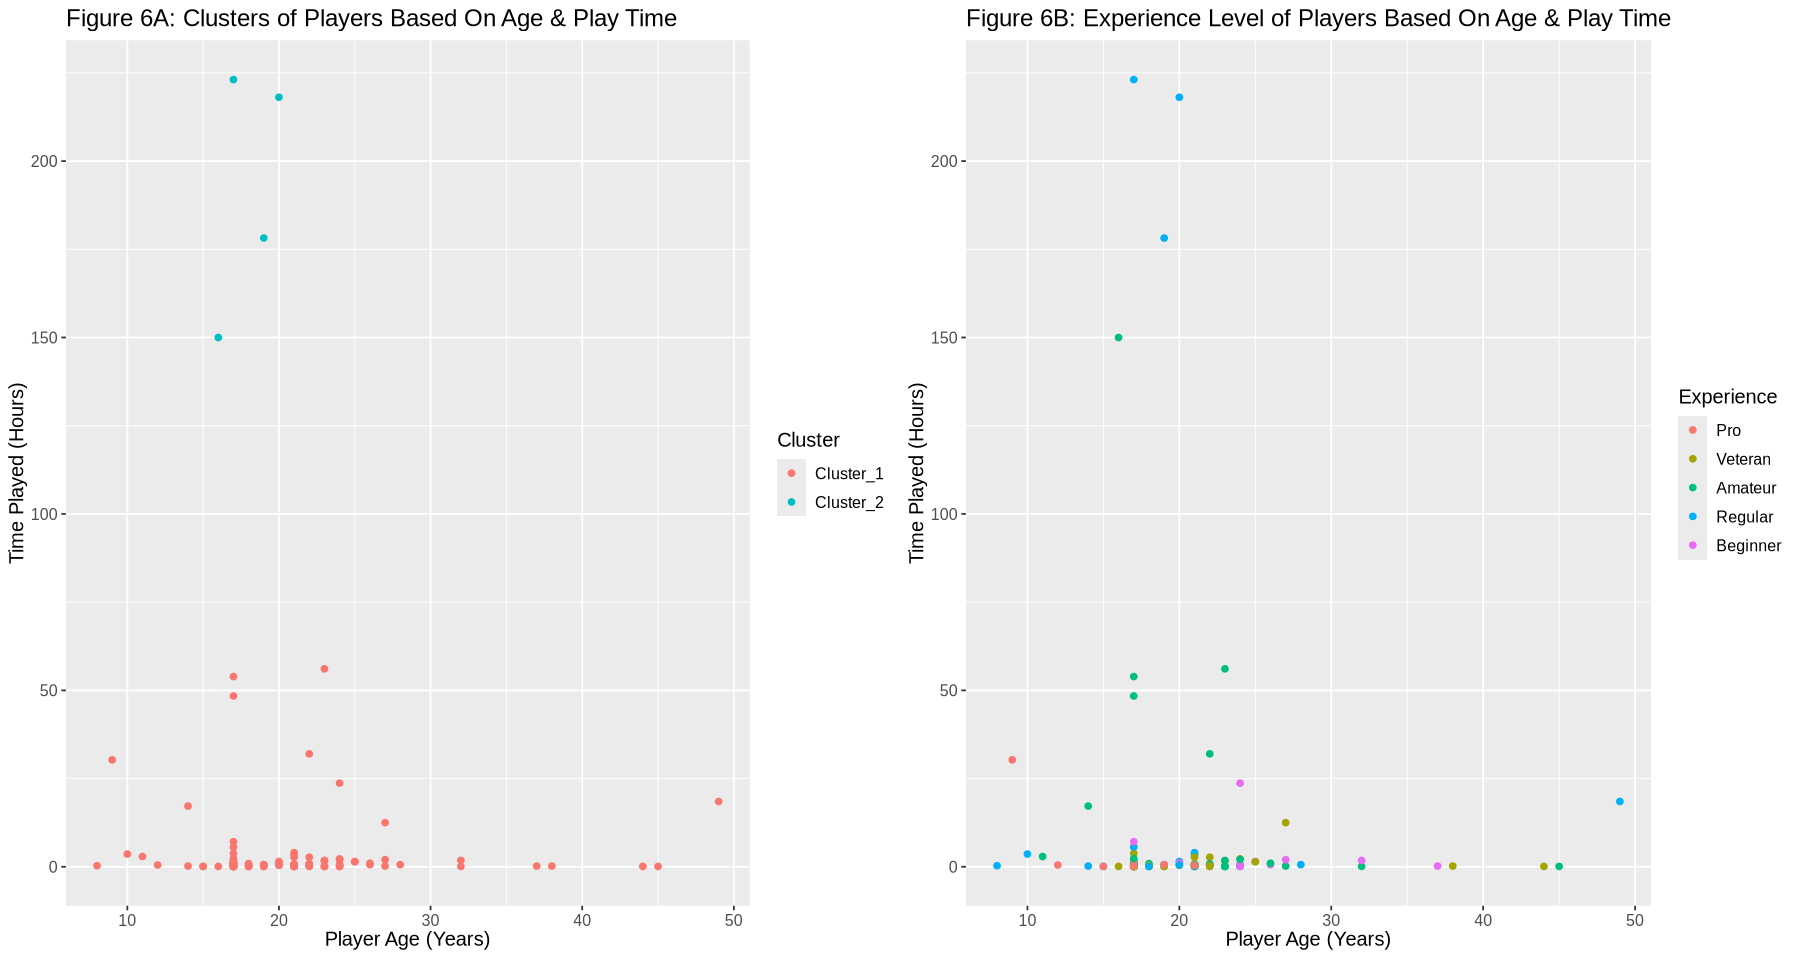

In [11]:
set.seed(2019) # DO NOT REMOVE
options(repr.plot.width = 15, repr.plot.height = 8)

players_final_kmeans <- k_means(num_clusters = 2) |>
    set_engine("stats", nstart = 10)

players_final_clusters <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_final_kmeans) |>
    fit(players_filtered) |>
    augment(players_filtered)

# Final cluster plot
players_final_clusters_plot <- 
    ggplot(players_final_clusters, 
           aes(x=age, y = played_hours, color = .pred_cluster)) +
        geom_point() +
        labs(x = "Player Age (Years)", y= "Time Played (Hours)", color = "Cluster") +
        ggtitle("Figure 6A: Clusters of Players Based On Age & Play Time") +
        theme(text = element_text(size = 12))

# Original filtered player plot
players_plot <- players_filtered |>
            ggplot(aes(x = age, y = played_hours)) + #plotting total hours played against age of player
            geom_point(aes(color = experience)) + #labelling each point based on player experience
            labs(x = "Player Age (Years)",
                 y = "Time Played (Hours)", 
                 colour = "Experience", 
                 title = "Figure 6B: Experience Level of Players Based On Age & Play Time") +
            theme(text = element_text(size = 12))

grid.arrange(players_final_clusters_plot, players_plot, ncol = 2)

We see in Fig. 6A that when we minimize the WSSD of our clustering, there are only two predicted clusters. We may consider cluster 2 of points with 150 or more play hours as "high contributers" and all other points in cluster 1 below as "regular contributers." When comparing the cluser visualised in Fig. 6A with the experience levels of the individual players in Fig. 6B, we see that 3/4 of the players within this cluster are "Regular" players. This agrees with our KNN classification and visualisations of the player data.

# Discussion

Based on our results, it appears that self-identified “regular” players contribute the most playing time which is not necessarily the result we would have expected. We would intuitively expect either “pro” or perhaps “veteran” players to contribute the most data as these experience levels indicate that the player has played many hours of Minecraft before signing up for this study. Upon further investigation, this result does make sense. Identifying as a “Pro” indicates that the player considers themselves to be a good player but does this necessarily mean that they play a lot? It is important to consider that these players could have either played a lot only in the past (in the case of “veteran” players) or are good at the game but don’t play a lot (in the case of “pro” players). Conversely, identifying as a “regular” player indicates that the player is regularly playing Minecraft without considering if the player is good or not. The latter information is not particularly relevant to our analysis, but it is pertinent to consider how player experience may bias players to identify as one experience level or another. Once we determined that “regular” players contribute the most playing time, we were able to answer our question and interpret the results in the context of this study which focuses on how to target players who will contribute the most playing time. As a refresher, here is the question we aimed to answer: can we determine a player’s experience level based on age and played hours? In the context of PLAI’s study, we ultimately want to determine which players are considered “regular” and target these players in our recruitment efforts. 

To do this, we decided to use the k-nearest neighbours (KNN) algorithm as our question poses a classification problem; we are trying to predict a categorical class (experience level) for observation based on two other numerical variables (age and played hours). Once we determined that K=5 nearest neighbours yielded the highest accuracy score (Fig. 4), we were able to retrain our classifier for all of the training data. With our classifier trained for K=5, we were able to evaluate our classifier. The prediction accuracy of our classifier is 0.2069 or 21% which is relatively low and indicates that our classifier is prone to making mistakes. However, the low accuracy may be attributed to the fact that the dataset was not very large. But what kind of mistakes? This is information we can gather from our confusion matrix which can be found earlier in our report. Being that we are trying to target “regular” players, let’s focus on that: based on our confusion matrix, only 1 out of 6 “regular” players were correctly classified as “regular. In other words, the classifier misclassified 83% of “regular” players. “Amateur” players, as they contribute the second highest amount of playing hours, could also be an important experience level class to target for recruitment efforts so let’s see how our classifier did in predicting that class: 4 out of 9 “amateur” players were correctly classified as “amateur” or 56% of “amateur” were misclassified. Another important metric that we can calculate using the confusion matrix is precision. The precision of our classifier is 14% which is quite low. This indicates that when the classifier predicts an experience level, we cannot trust with much certainty that it is correct. 

We expected that two numerical variables, age and played hours, would be able to successfully predict a categorical variable, experience level. Based on the accuracy and precision of the classifier we developed to do this, age and played hours do not seem to be the best predictors of experience level. Misclassifying experience levels would negatively impact recruiting efforts; since “regular” players seem to contribute the most playing time if players of other experience levels are classified as “regular”, the wrong players (players who contribute less playing time) will be targeted in recruiting efforts. Because “experience level” is self-identified at sign-up for this study, this variable has the potential to be subjective and completely unstandardized as there are no parameters when stating which level you are. A “beginner” could easily identify as a “pro” or vice versa depending on what the player’s definition of these experience levels are. We think this is where some of the issues with our classifier begin to arise. If experience level was somewhat standardized at sign-up for this study, possibly utilizing an assessment investigating parameters such as years playing or many achievements, experience may be easier to predict. This leads us to our first future question: How could we improve this classifier to better classify experience levels based on age and played hours? If it is not possible, even with standardization of the “experience level” variable, to improve our classifier we are led to ask a second future question: what variables from the data we were provided with would better predict experience level?

# Conclusion

In conclusion, we successfully determined the players that were most likely to contribute hours to the player to be players that identified as "regular" players of Minecraft. We found this by plotting the total amount of hours contributed by players of experience level. Furthermore, the results of our KNN clustering analysis agreed with this conclusion. In our cluster of "high-contributing players" who played 150 hours or more on the server, 3/4 players identified their experience levels as "regulars." However, we were not able to establish a strong KNN classification model that allowed us to predict which players were more likely to identify as "Regulars" based on player age and contribution hours. In general, we found these factors to be weak predictors of player experience level. This is due to the subjective nature of how players choose to self-identify at any given experience level. Future analysis should focus on a more standardized way to classify player types and identify more accurate predictors of which players are most likely to contribute to the server. 